In [1]:
import numpy as np
from gauss_elim import gaussSolve
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class lorenzSteadySt:
    '''Class for solving steady-state lorentz system'''
    
    def __init__(self,x0,param,tol=1.0e-10,tf=10.0,dt=0.01):
        self.x0=x0
        self.sig=param[0]
        self.r=param[1]
        self.b=param[2]
        self.tol=tol
        
        # Solve steady state with Newton's method
        self.xSteps=self.lorentz_solve(x0)
        
        # Propagate with rk4
        rkPoints=np.linspace(0,tf,int(np.ceil(tf/dt)))
        self.tSteps=self.rk4(x0,rkPoints,dt)
        
    def lorentz_solve(self,x):
        '''Solve the steady-state Lorentz system using NR method'''
        maxSteps=100 # Limit the number of steps in case of divergence
        
        xSteps=[x]
        for step in range(maxSteps):
            
            x1=np.array(xSteps[-1]-gaussSolve(self.J(xSteps[-1]),self.f_x(xSteps[-1])).x)
            xSteps.append(x1)
        
            # Convergence test
            if abs(max(xSteps[-1])) < self.tol and max(abs(xSteps[-1]-xSteps[-2])) < self.tol:
                return np.stack(xSteps)
            elif max(abs(xSteps[-1]-xSteps[-2])) < max(abs(xSteps[-1]))*self.tol:
                return np.stack(xSteps)
            
        # If we end up here, out root did not converge
        raise('Root did not converge')

    def rk4(self,x0,rkPoints,dt):
        '''Propagating Lorenz system with rk4'''
           
        tSteps=[x0]
        for t in rkPoints:
            k1=dt*self.f_x(tSteps[-1])
            k2=dt*self.f_x(tSteps[-1]+0.5*k1)
            k3=dt*self.f_x(tSteps[-1]+0.5*k2)
            k4=dt*self.f_x(tSteps[-1]+k3)
            tSteps.append(tSteps[-1]+np.array((k1+2.0*k2+2.0*k3+k4)/6.0))
                    
        return np.stack(tSteps)
        
    def J(self,x):
        '''Evaluate the Jacobian of the Lorentz System'''
        return np.array([[-self.sig,self.r-x[2],x[1]],\
                         [self.sig,-1.,x[0]],\
                         [0.,-x[0],-self.b]]).T

    def f_x(self,x):
        '''Evaluate the RHS of the Lorentz System'''
        return np.array([self.sig*(x[1]-x[0]),\
                    self.r*x[0]-x[1]-x[0]*x[2],\
                    x[0]*x[1]-self.b*x[2]])


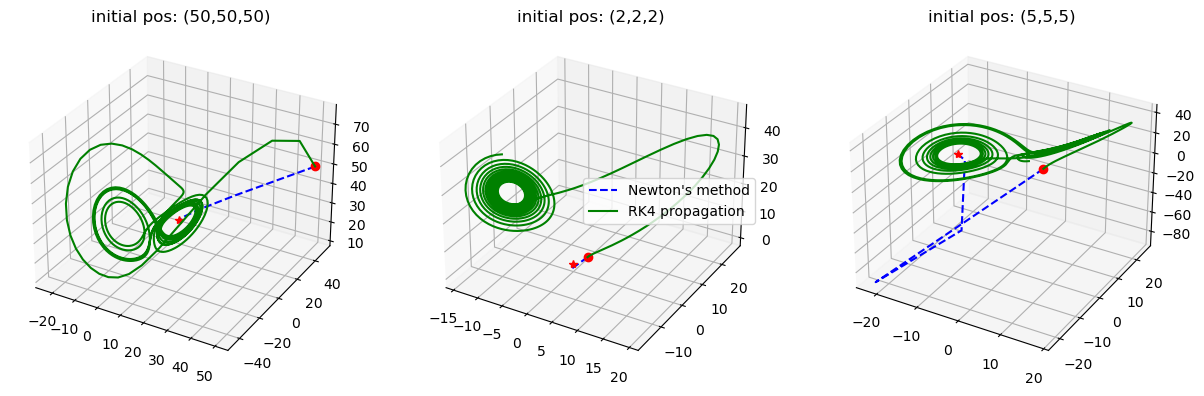

In [2]:
# Parameters
param=np.array([10,28,8.0/3.0])

# Start with different initial conditions
x0=np.array([50.,50.,50.])
lorenz50=lorenzSteadySt(x0,param)

x0=np.array([2.,2.,2.])
lorenz2=lorenzSteadySt(x0,param)

x0=np.array([5.,5.,5.])
lorenz5=lorenzSteadySt(x0,param)

sol=[lorenz50,lorenz2,lorenz5]

# Now lets plot the convergence
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

axes=[ax1,ax2,ax3]
titles=['initial pos: (50,50,50)','initial pos: (2,2,2)','initial pos: (5,5,5)']
for n in range(0,3):
    x=sol[n].xSteps
    t=sol[n].tSteps
    axes[n].plot(x[:,0],x[:,1],x[:,2],'b--',label="Newton's method")
    axes[n].plot([x[0,0]],[x[0,1]],[x[0,2]],'ro')
    axes[n].plot([x[-1,0]],[x[-1,1]],[x[-1,2]],'r*')
    axes[n].plot(t[:,0],t[:,1],t[:,2],'g',label='RK4 propagation')
    axes[n].set_title(titles[n])

ax2.legend(loc = 'center right')

plt.savefig('lorentz.pdf',bbox_inches='tight')
plt.show()


In [ ]:
#fig,ax1=plt.subplots()
#ax1.plot(t[:,0],t[:,2])